Import Library

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Function


In [6]:
def read_image(path):
    # Load original image in color
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    return image

def thresholding(image, threshold=128):
    # Apply thresholding to create a binary image on each channel
    binary = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for c in range(3):
                binary[i, j, c] = 255 if image[i, j, c] >= threshold else 0
    return binary

def negative(image):
    # Apply negative transformation on each channel
    neg_img = 255 - image
    return neg_img

def contrast_stretching(image):
    # Apply contrast stretching on each channel
    min_val = np.min(image, axis=(0,1))
    max_val = np.max(image, axis=(0,1))
    stretched = (image - min_val) * (255 / (max_val - min_val))
    return stretched.astype(np.uint8)

def image_subtraction(image, crop_x, crop_y, width, height):
    # Crop image using subtraction method
    cropped = image[crop_y:crop_y+height, crop_x:crop_x+width]
    return cropped

def histogram_normalization(image):
    # Normalize histogram manually on each channel
    hist_norm = np.zeros_like(image, dtype=np.uint8)
    for c in range(3):
        hist, _ = np.histogram(image[:, :, c], bins=256, range=(0, 256))
        cdf = np.cumsum(hist)
        cdf_min = cdf[cdf > 0].min()
        hist_norm[:, :, c] = ((cdf[image[:, :, c]] - cdf_min) * 255) // (image.size // 3 - cdf_min)
    return hist_norm


Eksekusi Program

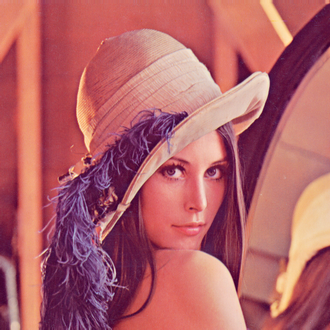

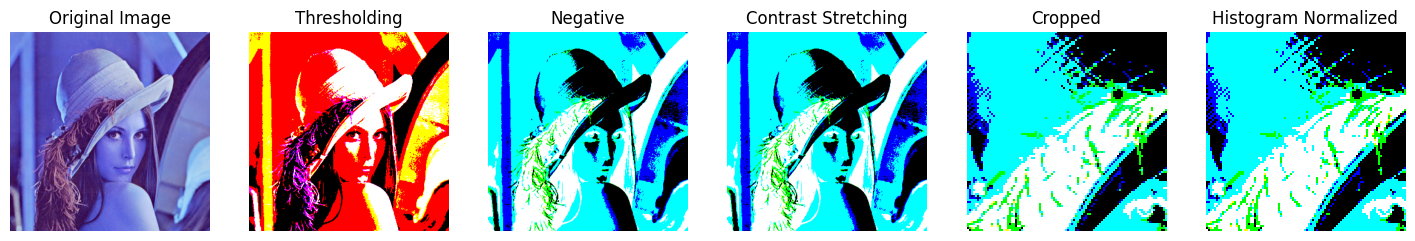

In [7]:

# Load image
original_image = read_image('Lenna.png')

# Display original image
cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step 1: Thresholding
thresh_image = thresholding(original_image)

# Step 2: Negative transformation
negative_image = negative(thresh_image)

# Step 3: Contrast Stretching
contrast_image = contrast_stretching(negative_image)

# Step 4: Cropping using image subtraction (example: center crop 100x100)
h, w, _ = contrast_image.shape
crop_x, crop_y = w//4, h//4
cropped_image = image_subtraction(contrast_image, crop_x, crop_y, 100, 100)

# Step 5: Histogram Normalization
normalized_image = histogram_normalization(cropped_image)

# Display results
fig, axes = plt.subplots(1, 6, figsize=(18, 5))
titles = ['Original Image', 'Thresholding', 'Negative', 'Contrast Stretching', 'Cropped', 'Histogram Normalized']
images = [cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), thresh_image, negative_image, contrast_image, cropped_image, normalized_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off')

plt.show()
